<a href="https://colab.research.google.com/github/Anuj2409/Neural-Network-Basics/blob/master/NN_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Reference   https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7



<Figure size 432x288 with 0 Axes>

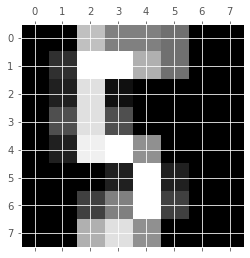

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

In [0]:
onehot_target = pd.get_dummies(dig.target)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
1617/1617 [==============================] - 0s 300us/step - loss: 1.9746 - categorical_accuracy: 0.5844
Epoch 2/10
1617/1617 [==============================] - 0s 27us/step - loss: 0.2655 - categorical_accuracy: 0.9072
Epoch 3/10
1617/1617 [==============================] - 0s 26us/step - loss: 0.1389 - categorical_accuracy: 0.9629
Epoch 4/10
1617/1617 [==============================] - 0s 32us/step - loss: 0.1079 - categorical_accuracy: 0.9697
Epoch 5/10
1617/1617 [==============================] - 0s 28us/step - loss: 0.0673 - categorical_accuracy: 0.9827
Epoch 6/10
1617/1617 [==============================] - 0s 27us/step - loss: 0.0461 - categorical_accuracy: 0.9895
Epoch 7/10
1617/1617 [==============================] - 0s 29us/step - loss: 0.0389 - categorical_accuracy: 0.9907
Epoch 8/10
1617/1617 [==============================] - 0s 31us/step - loss: 0.0305 - categorical_accuracy: 0.9951
Epoch 9/10
1617/1617 [==============================] - 0s 31us/step - loss: 0.

In [92]:
y_pred = model.predict(x_val)

#Converting predictions to label
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = []
for i in y_val.index:
    test.append(np.argmax(y_val.loc[i], axis = 0))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [94]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 97.77777777777777
